In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


data=[]
labels=[]
sets=36
cur_path=os.getcwd()
print("Completed")

/home/nikith/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nikith/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nikith/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nikith/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

Completed


In [3]:
for i in range(sets):
    path=os.path.join(cur_path,"Training",str(i))
    images=os.listdir(path)
    print(str(i),end=" ")
    for file_name in images:
        try:
            image= Image.open(path+ "/" +file_name)
            image=image.resize((30,30))
            image= np.array(image)
            data.append(image)
            labels.append(i)
        
        except Exception as e:
            print("Error loading image:"+file_name+"\n"+e)
            break
            
                              
data=np.array(data)
labels=np.array(labels)

print("\n",data.shape, labels.shape)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 
 (28446, 30, 30, 3) (28446,)


(22756, 30, 30, 3) (22756,) (5690, 30, 30, 3) (5690,)
19
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


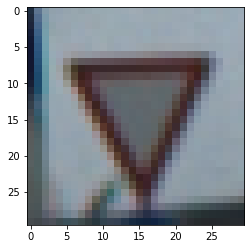

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=35)
y_test2=y_test
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(y_test[9])

y_train=to_categorical(y_train,36)
y_test=to_categorical(y_test,36)

print(y_test[9])
plt.imshow(x_test[9])

In [12]:
model=Sequential()
shape=x_train.shape[1:]
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=shape))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(36, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Compiled")

Compiled


In [17]:
history=model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_test, y_test))
model.save("tsr.h5")

Train on 22756 samples, validate on 5690 samples
Epoch 1/3
22756/22756 [==============================] - 111s 5ms/step - loss: 0.3007 - accuracy: 0.9108 - val_loss: 0.0784 - val_accuracy: 0.9777
Epoch 2/3
22756/22756 [==============================] - 112s 5ms/step - loss: 0.2917 - accuracy: 0.9151 - val_loss: 0.0735 - val_accuracy: 0.9800
Epoch 3/3
22756/22756 [==============================] - 118s 5ms/step - loss: 0.2565 - accuracy: 0.9244 - val_loss: 0.0660 - val_accuracy: 0.9784


In [14]:
loaded=load_model('tsr.h5')

right=0
tot=0
for i in range(sets):
    data=[]
    path=os.path.join(cur_path,"Training",str(i))
    images=os.listdir(path)
    for img in images:
        image= Image.open(path+ "/" +img)
        image=image.resize((30,30))
        image= np.array(image)
        data.append(image)
    data=np.array(data)
    pred=loaded.predict_classes(data)
    for j in pred:
        tot+=1
        if(j==i):
            right+=1
print(right/tot)

0.9746185755466498


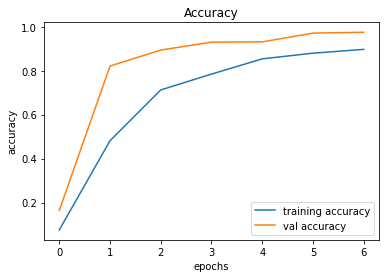

In [15]:
plt.figure()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()

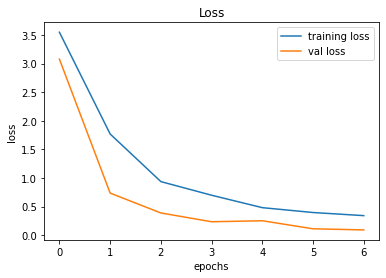

In [16]:
plt.figure()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()